Подключение библиотек и скриптов

In [12]:
import pandas as pd
import numpy as np
import pickle


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
import catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [10]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

Путь к деректориям и файлам


In [13]:
TRAIN_DATASET_PATH = "/Users/VIKA/Python/Python.git/course_project_train.csv"
TEST_DATASET_PATH = "/Users/VIKA/Python/Python.git/course_project_test.csv"
PREP_DATASET_PATH = "/Users/VIKA/Python/Python.git/kURAPOVA_E_V_course project.csv"

In [15]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [30]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [31]:
train_df.shape, test_df.shape

((7500, 17), (2500, 16))

In [34]:
train_df.iloc[0]

Home Ownership                            Own Home
Annual Income                             482087.0
Years in current job                           NaN
Tax Liens                                      0.0
Number of Open Accounts                       11.0
Years of Credit History                       26.3
Maximum Open Credit                       685960.0
Number of Credit Problems                      1.0
Months since last delinquent                   NaN
Bankruptcies                                   1.0
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                     99999999.0
Current Credit Balance                     47386.0
Monthly Debt                                7914.0
Credit Score                                 749.0
Credit Default                                   0
Name: 0, dtype: object

In [35]:
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

Приведение признаков


In [36]:
train_df.select_dtypes(include='object').columns.tolist()

['Home Ownership', 'Years in current job', 'Purpose', 'Term']

In [12]:
for colname in ['Tax Liens']:
    train_df[colname]= train_df[colname].astype(str)

In [13]:
train_df.select_dtypes(include='object').columns.tolist()

['Home Ownership', 'Years in current job', 'Tax Liens', 'Purpose', 'Term']

Рассмотрим целевую переменную


In [53]:
train_df['Credit Default'].value_counts(normalize='True')

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

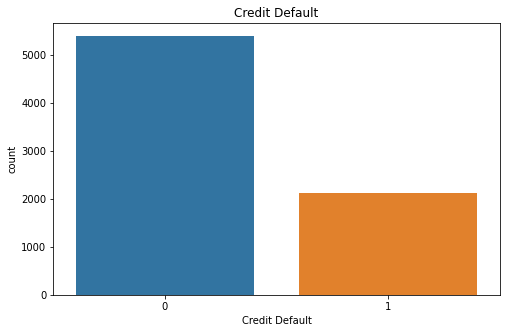

In [54]:
plt.figure(figsize=(8, 5))

sns.countplot(x='Credit Default', data=train_df)

plt.title('Credit Default')
plt.show()

Обзор количественных признаков


In [55]:
train_df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7500.0,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.0,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.0,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.0,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.0,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.0,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.0,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,0.0,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


Обзор номинативных признаков

In [16]:
for col_colname in train_df.select_dtypes(include='object').columns:
    print('\n\n'+ str(col_colname)+'\n\n'+ str(train_df[col_colname].value_counts()))



Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64


Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64


Tax Liens

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64


Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpo

Обработка пропусков


In [11]:
len(train_df)-train_df.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

Оценка признака "Bankruptcies" в разрезе целевой переменной

Уберем пропуски из признака "Bankruptcies"


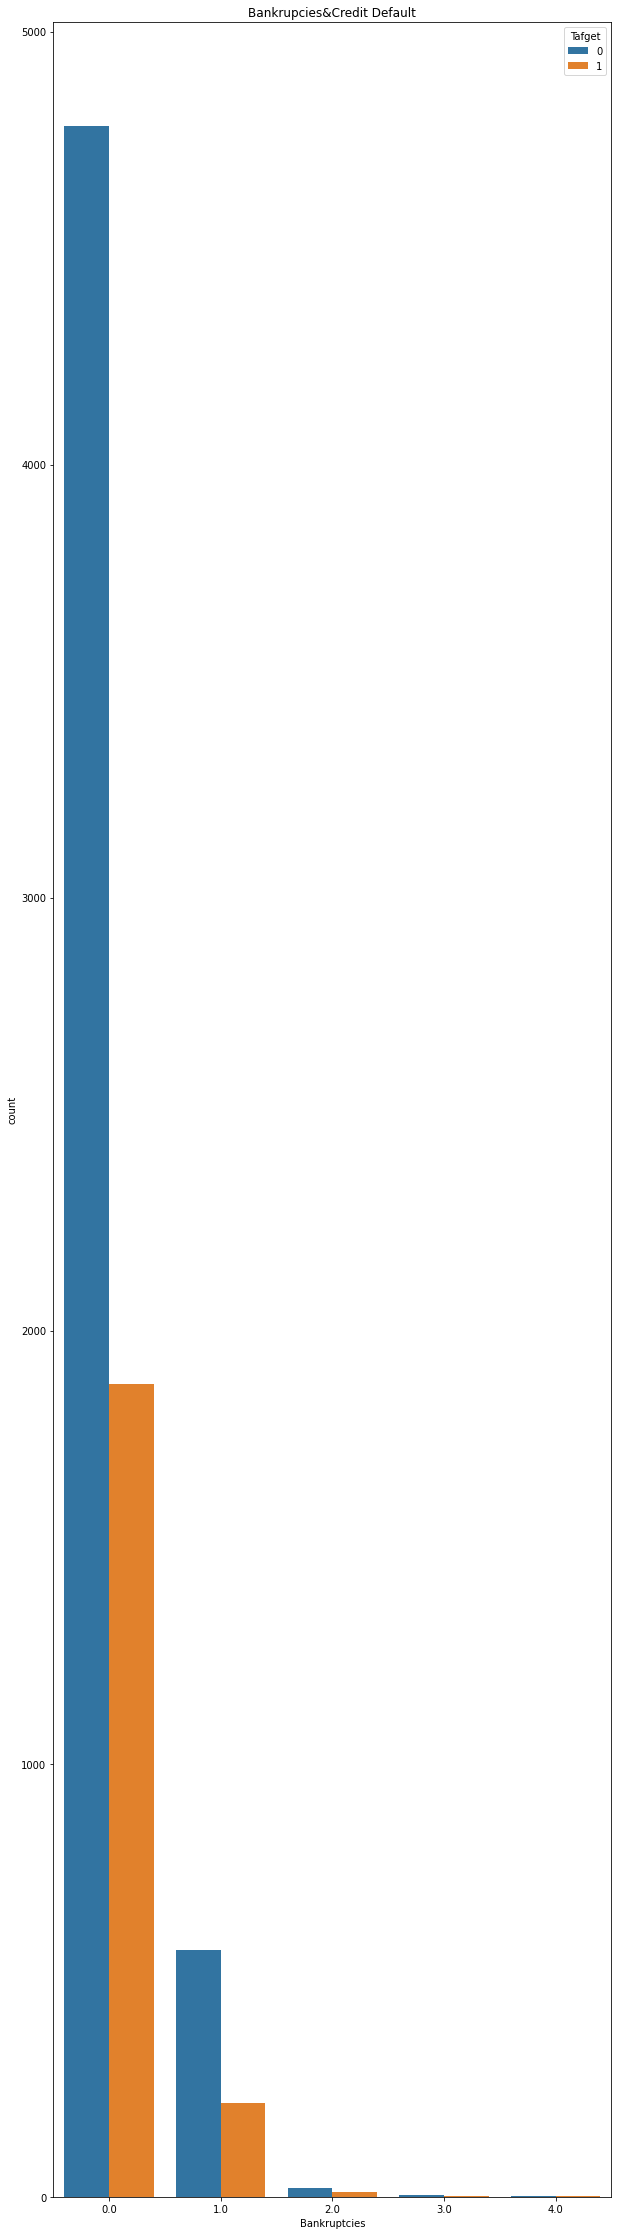

In [16]:
plt.figure(figsize=(10,40))

sns.countplot(x="Bankruptcies", hue="Credit Default", data=train_df)
plt.title('Bankrupcies&Credit Default')
plt.legend(title='Tafget', loc='upper right')


plt.show()

In [17]:
class DataPreprocessing:
    """Подготовка исходных данныъ"""
    def __init__(self):
        self.madian = None
        self.quantile = None
        self.quantile_credit_score = None
        #self.quantile_Max_Open_Credit = None
        #self.quantile_Max_Open_Credit_1 = None
        #self.quantile_Max_Open_Credit_2 = None
        #self.quantile_Max_Open_Credit_3 = None
        
    """Сохранение статистик""" 
    def fit (self,X):
        self.medians = X.median()
        self.quantile = X.quantile(.975) 
        self.quantile_credit_score = X.quantile(.755) 
       # self.quantile_Max_Open_Credit = X.quantile(.990)
       # self.quantile_Max_Open_Credit_1 = X.quantile(.980)
       # self.quantile_Max_Open_Credit_2 = X.quantile(.600)
       # self.quantile_Max_Open_Credit_3 = X.quantile(.700)
        
    """Трансформация данных"""
    def transform (self, X):
        #Annual Income
        X['Annual Income_nan'] = X['Annual Income'].isna()*1
        condition = X['Annual Income'].isna()
        X.loc[condition,'Annual Income']=0
        
        #Months since last delinquent
        X['Months since last delinquent_nan'] = X['Months since last delinquent'].isna()*1
        condition = X['Months since last delinquent'].isna()
        X.loc[condition,'Months since last delinquent']=0
        
         
        #Bankruptcies
        X['Bankruptcies_nan'] = X['Bankruptcies'].isna()*1
        condition = X['Bankruptcies'].isna()
        X.loc[condition,'Bankruptcies']= 0.0
                        
        X.loc[(X['Bankruptcies'] == '4.0') & (X['Bankruptcies'] == '2.0'), 'Bankruptcies'] = 3.0 
                    
               
        #Number of Open Accounts
        condition = (X['Number of Open Accounts'].isna()) \
             | (X['Number of Open Accounts'] > self.quantile['Number of Open Accounts'])
        
        X.loc[condition, 'Number of Open Accounts'] = self.medians['Number of Open Accounts']
        
        #Years in current job
        X['Years in current job_nan'] = X['Years in current job'].isna()*1
        condition = X['Years in current job'].isna()
        X.loc[condition,'Years in current job']= '< 1 year'
        
        
        #Years of Credit History
        condition = (X['Years of Credit History'].isna()) \
             | (X['Years of Credit History'] > self.quantile['Years of Credit History'])
        
        X.loc[condition, 'Years of Credit History'] = self.medians['Years of Credit History']
        
        #Months since last delinquent
        condition = (X['Months since last delinquent'].isna()) \
                 | (X['Months since last delinquent'] > self.quantile['Months since last delinquent'])
        
        X.loc[condition, 'Months since last delinquent'] = self.medians['Months since last delinquent']
       
        
        #Current Credit Balance
        condition = (X['Current Credit Balance'].isna()) \
             | (X['Current Credit Balance'] < self.quantile['Current Credit Balance'])
        
        X.loc[condition, 'Current Credit Balance'] = self.medians['Current Credit Balance']
        
        #Credit Score
        condition = (X['Credit Score'].isna()) \
             | (X['Credit Score'] > self.quantile_credit_score['Credit Score'])
        
        X.loc[condition, 'Credit Score'] = self.medians['Credit Score']
        
        #Current Loan Amount
        condition = (X['Current Loan Amount'] > self.quantile['Current Loan Amount']) \
             | (X['Current Loan Amount'] == self.quantile['Current Loan Amount'])
        X.loc[condition, 'Current Loan Amount'] = self.medians['Current Loan Amount']
        
        #Maximum Open Credit
        #condition = (X['Maximum Open Credit'] > self.quantile_Max_Open_Credit['Maximum Open Credit']) 
        #condition_1 = (X['Maximum Open Credit'] > self.quantile_Max_Open_Credit_1['Maximum Open Credit']) 
        
        #X.loc[condition, 'Maximum Open Credit'] =  self.quantile_Max_Open_Credit_2['Maximum Open Credit']
        #X.loc[condition_1, 'Maximum Open Credit'] = self.quantile_Max_Open_Credit_3['Maximum Open Credit']
        
      
        return X

Построение новых призанаков


In [18]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.binary_bankruptcies = None
        self.Feature_Home_Ownership = None
        self.Feature_Years_in_current_job = None
        
        
    def fit(self, X):
        
        X = X.copy()
        
        self.binary_bankruptcies={'0.0':0,'nan':1,'2.0':1,'3.0':1,'4.0':1,'1.0':1}
        self.Feature_Home_Ownership={'Home Mortgage':0,'Have Mortgage':0,'Rent':1,'Own Home':2}
        self.Feature_Years_in_current_job={'< 1 year':0,'1 year':0,'2 years':0,'3 years':0, '4 years':0,
                                      '5 years':1,'6 years':1,'7 years':1,'8 years':1,'9 years':1,
                                      '10+ years':2}# разбили признак на 3 категории
      
    
    def transform (self, X):
        
        X['Bankruptcies']=X['Bankruptcies'].replace(self.binary_bankruptcies)
        X['Home Ownership']=X['Home Ownership'].replace(self.Feature_Home_Ownership)
        X['Years in current job']=X['Years in current job'].replace(self.Feature_Years_in_current_job)
        X['ID']=X.index
        
        
        X['Bankruptcies']=X['Bankruptcies'].astype(float) 
        X['Home Ownership']=X['Home Ownership'].astype(float) 
        X['Years in current job']=X['Years in current job'].astype(float) 
        
        
        return X

In [45]:
train_df.tail()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0
7499,Rent,NaN,4 years,0.0,8.0,9.4,480832.0,0.0,NaN,0.0,debt consolidation,Short Term,26928.0,288192.0,9061.0,NaN,0


Отбор признаков

In [21]:
train_df.columns.tolist()

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

In [19]:
NUM_FEATURE_NAMES = ['Annual Income','Number of Open Accounts', 'Years of Credit History','Maximum Open Credit',
                     'Months since last delinquent', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
                    'Credit Score']
CAT_FEATURE_NAMES = ['Tax Liens','Purpose', 'Term']
NEW_FEATURE_NAMES = ['Annual Income_nan','Months since last delinquent_nan','Bankruptcies_nan',
                     'Years in current job_nan','Home Ownership','Years in current job','Bankruptcies']
TARGET_NAME = 'Credit Default'

Разбиение на train и test

In [20]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

In [283]:
train_df.shape, test_df.shape

((7500, 17), (2500, 16))

In [21]:
X = train_df.drop(columns=CAT_FEATURE_NAMES + [TARGET_NAME])
y = train_df[TARGET_NAME]
test_df = test_df.drop(columns=CAT_FEATURE_NAMES)

In [285]:
X.shape, y.shape, test_df.shape

((7500, 13), (7500,), (2500, 13))

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [114]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, test_df.shape

((5025, 12), (5025,), (2475, 12), (2475,), (2500, 12))

In [24]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)

test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

<ipython-input-17-17e1ff38ea6b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Annual Income_nan'] = X['Annual Income'].isna()*1
c:\users\vika\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-17-17e1ff38ea6b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

((5025, 17), (2475, 17), (2500, 17))

In [25]:
X_train.shape, y_train.shape

((5025, 17), (5025,))

In [26]:
features_gen = FeatureGenetator()
features_gen.fit(X_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

<ipython-input-18-6f7784f6540c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Bankruptcies']=X['Bankruptcies'].replace(self.binary_bankruptcies)
<ipython-input-18-6f7784f6540c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Home Ownership']=X['Home Ownership'].replace(self.Feature_Home_Ownership)
<ipython-input-18-6f7784f6540c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

((5025, 18), (2475, 18), (2500, 18))

Присвоение признаков

In [28]:
X_train = X_train[NUM_FEATURE_NAMES + NEW_FEATURE_NAMES]
X_valid = X_valid[NUM_FEATURE_NAMES + NEW_FEATURE_NAMES]
test_df = test_df[NUM_FEATURE_NAMES + NEW_FEATURE_NAMES]

In [29]:
X_train.shape, y_train.shape

((5025, 16), (5025,))

Стандартизация данных

In [30]:
scaler = StandardScaler()

stand_features_train = scaler.fit_transform(X_train[NUM_FEATURE_NAMES + NEW_FEATURE_NAMES])
stand_features_valid = scaler.transform(X_valid[NUM_FEATURE_NAMES + NEW_FEATURE_NAMES])

In [31]:
X_train[NUM_FEATURE_NAMES + NEW_FEATURE_NAMES] = stand_features_train
X_valid[NUM_FEATURE_NAMES + NEW_FEATURE_NAMES] = stand_features_valid

Проверка на пропуски итоговых датасетов

In [32]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

In [33]:
X_train.shape, y_train.shape

((5025, 16), (5025,))

Построение модели

In [34]:
final_model = catb.CatBoostClassifier(n_estimators=500, max_depth=3,
                                       l2_leaf_reg=10,silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_valid)
y_test_pred_probs = final_model.predict_proba(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      3611
           1       0.84      0.13      0.22      1414

    accuracy                           0.75      5025
   macro avg       0.79      0.56      0.53      5025
weighted avg       0.77      0.75      0.67      5025

TEST

              precision    recall  f1-score   support

           0       0.73      0.98      0.84      1776
           1       0.66      0.09      0.16       699

    accuracy                           0.73      2475
   macro avg       0.69      0.54      0.50      2475
weighted avg       0.71      0.73      0.65      2475

CONFUSION MATRIX

col_0              0   1
Credit Default          
0               1743  33
1                636  63


Подбор гиперпараметров

In [75]:
%%time
params = {'n_estimators':[500, 1500, 2000, 4000], 
          'max_depth':[3, 5, 7, 10]}

gs = GridSearchCV(final_model, params, 
                  scoring='r2', # метрика 
                  cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
                           random_state=21, 
                           shuffle=True),
                  n_jobs=-1
                  )
gs.fit(X_train, y_train)

Wall time: 40min 50s


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x00000278E2B12880>,
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [500, 1500, 2000, 4000]},
             scoring='r2')

In [76]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [35]:
final_model.best_score_

{'learn': {'Logloss': 0.4999745032983046}}

c:\users\vika\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


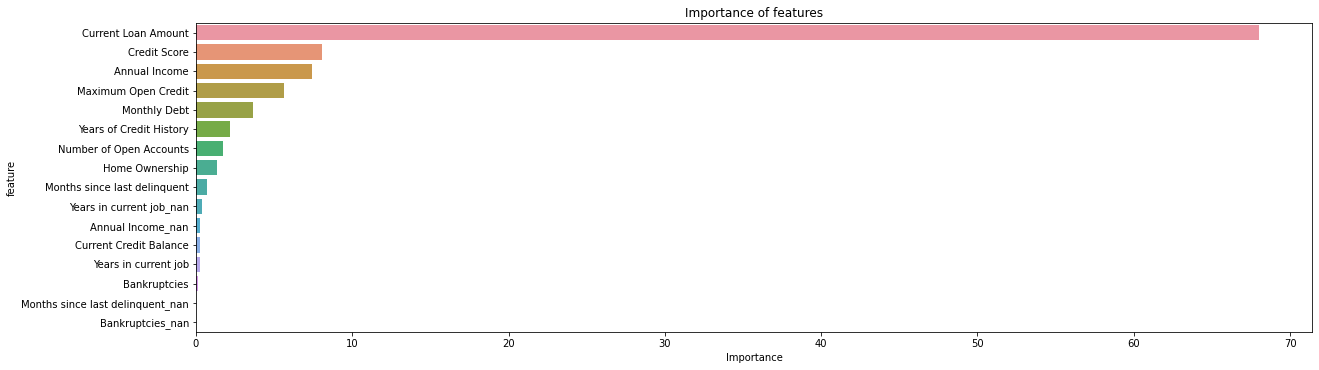

In [36]:
important_features_top = show_feature_importances(X_train.columns, final_model.feature_importances_, get_top=10)

In [28]:
important_features_top

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Maximum Open Credit',
 'Monthly Debt',
 'Years of Credit History',
 'ID',
 'Number of Open Accounts',
 'Home Ownership',
 'Months since last delinquent']

Прогнозирование на тестовом датасете

In [38]:
predictions = final_model.predict(test_df)

In [48]:
with open(PREP_DATASET_PATH, 'wb') as file:
    pickle.dump(predictions, file)